# ASIGNEMENT 3
Name : Victor Garcia Cervantes, Paula Cantí Herreros, Marta Campo Mascaray

student ID : 

## Exercise 1
Try to find the optimal configuration for smaller problem; up to N = 11


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
#from vpython import curve,rate,canvas,vector,sphere

In [2]:
# Start off by defining some functions that we will use several times
def distance(r1,r2):
    '''Given two different positions, this function returns the distance modulus between these two positions.'''
    return np.linalg.norm(r2 - r1)

def energy(r):
    '''Being r a vector containing the position of several particles in a system:
    - r = ([x_1,y_1],[x_2,y_2],...[x_N,y_N])
    this function computes and returns the energy of the overall system'''
    
    N = len(r)
    total_E = 0
    
    for i in range(N):
        for j in range(N):
            if i!=j:  # Since obviously the i-th particle does not increase its own energy
                
                # Firstly we extract the positions of the i and j particles
                r1 = r[i]
                r2 = r[j]
                
                # Compute the contribution of the interaction between particles i and j to the 
                #  overall Energy 
                E = 1/distance(r1,r2)
                
                total_E += E
                
    return total_E

def force(r,i):
    '''This function computes the force that particle i feels from all the other particles in the system.
    Given the vector r:
    - r = ([x_1,y_1],[x_2,y_2],...[x_N,y_N])
    the value of the overall force is returned as a vector.'''
    N = len(r)
    total_F = np.zeros(shape = (2,1))
    
    for j in range(N):
        if i!=j:  # Since particle i does not interact with itself
            vect = []
                
            # Firstly we extract the positions of the i and j particles
            r1 = r[i]
            r2 = r[j]
                
            dis = [r1[0] - r2[0] , r1[1] - r2[1]]  # Vector that shows the direction of the Force
            distance_cubed = ( distance(r1,r2) )**3  
            
            F_x = dis[0] / distance_cubed
            F_y = dis[1] / distance_cubed
            
            total_F[0] += F_x
            total_F[1] += F_y
            
    return total_F

def circle(r_i):
    '''remember while loops only run when the condition is True, therefore once we have found a point inside 
    the circle we need to return False, so the loop finishes and we can continue'''
    return np.linalg.norm(r_i) <= 1
    
def specific_heat(E,T):
    '''E is an array containing all the energy values attempted'''
    E_squared_avg = np.mean(np.array(E) ** 2)
    E_avg_squared = np.mean(E) ** 2
    return (E_squared_avg - E_avg_squared) / (T ** 2)
    
    
def annealing_step(r,T,Niter):
    '''Function that realizes one step for a given T of the annealing method'''
    
    E_0 = energy(r)  # Energy of the original configuration
    energies = []
    
    # realize Niter iterations before we reduce the temperature
    for _ in range(Niter):
        
        # repeat this process for each particle of the system
        for i in range(len(r)):
            r_i = r[i]
            
            # Keep creating new points until they are inside the circle, and to make sure that our points 
            #  maintain themselves inside the circle.
            while True:
                Ar_x = np.random.uniform(-0.01,0.01)
                Ar_y = np.random.uniform(-0.01,0.01)
            
                r_x = r_i[0] + Ar_x # Updating x-position of the modified particle
                r_y = r_i[1] + Ar_y # Updating y_position of the modified particle

                new_r_i = [r_x,r_y]
                if circle(new_r_i):
                    break
                    
            
            new_r = r.copy()
            new_r[i] = new_r_i
            
            E_f = energy(new_r)
            
            if E_f < E_0:
                # If the energy of the new configuration is lower we accept the new configuration
                r = new_r
            else:
                AE = E_f - E_0  # Define the Energy difference

                p = np.exp(-AE/T)
                if np.random.uniform() <= p:  # Metropolis criteria 
                    r = new_r
                    energies.append(energy(r))

            E_0 = energy(r)  # Actualize the value of the original energy, according to the current configuration
            energies.append(E_0)
        
    C_T = specific_heat(energies,T) # Compute the corresponding specific heat for this temperature
        
    return r,C_T,E_0

In [3]:
## TESTING FOR ANNEALING_STEP #########
N = 3
r = np.random.uniform(-1,1,size = (N,2))
for i in range(N):
    #print(i)
    while True:
        r_i = r[i]
        if circle(r_i):
            break
        r[i] = np.random.uniform(-1,1,size = (1,2))
print(f'Initial configuration = {r}')

T = 100
Niter = 100
final_r,specific_heats,energies = annealing_step(r,T,Niter)

Initial configuration = [[-0.76336689 -0.32185135]
 [-0.29116903  0.04133146]
 [-0.5944567   0.11666616]]


In [4]:
def annealing_method(N,Niter,Tmax):
    ''''''
    Number_T = 200 # Number of temperatures we are going to compute
    
    # Start off by genereting N particles positioned inside the circle
    T = Tmax
    r = np.random.uniform(-1,1,size = (N,2))
    for i in range(N):
        while True:
            r_i = r[i]
            # print(f'distance of Current studied r_i : {np.sqrt(r_i[0]**2 + r_i[1]**2)}')
            if circle(r_i):
                break
            r[i] = np.random.uniform(-1,1,size = (1,2))

    
    temperatures = []
    energies = []
    specific_heats = []
    for _ in range(Number_T):
        
        temperatures.append(T)
        
        r,C_T,E = annealing_step(r,T,Niter)
        # print(f'FINAL VALUES :{_} \n r = {r} \n Specific heat = {C_T} \n Energy = {E}')
        # if _ % 10 == 0:
            
        T = 0.9*T
        
        energies.append(E)
        specific_heats.append(C_T)
        
    final_r = r     
    return temperatures,energies,specific_heats,final_r

In [5]:

N=12 # Number of particles

temps,Es,C,final_r = annealing_method(N,10,500)

KeyboardInterrupt: 

FINAL VALUES :159 
 r = [[ 0.70163424 -0.71250812]
 [-0.70028602  0.71385905]
 [ 0.99180146 -0.12754468]
 [ 0.87386779  0.48613011]
 [-0.14679533  0.98915563]
 [ 0.32596493 -0.15394215]
 [ 0.4446407   0.89567823]
 [-0.87442033 -0.48511579]
 [-0.3248718   0.15301549]
 [-0.99173432  0.12829841]
 [ 0.14507899 -0.98940616]
 [-0.44362624 -0.89620976]] 
 Specific heat = 1.0062867633857133 
 Energy = 121.37371569449259
FINAL VALUES :160 
 r = [[ 0.70163424 -0.71250812]
 [-0.70028602  0.71385905]
 [ 0.99153985 -0.12965238]
 [ 0.87738579  0.47978292]
 [-0.14679533  0.98915563]
 [ 0.32249716 -0.1527108 ]
 [ 0.4446407   0.89567823]
 [-0.87442033 -0.48511579]
 [-0.32643709  0.15508756]
 [-0.99173432  0.12829841]
 [ 0.14507899 -0.98940616]
 [-0.44362624 -0.89620976]] 
 Specific heat = 45.54143021320979 
 Energy = 121.37337877365026
FINAL VALUES :161 
 r = [[ 0.70163424 -0.71250812]
 [-0.70028602  0.71385905]
 [ 0.99153985 -0.12965238]
 [ 0.87738579  0.47978292]
 [-0.14679533  0.98915563]
 [ 0.32324

FINAL VALUES :179 
 r = [[ 0.70013655 -0.7139978 ]
 [-0.70028602  0.71385905]
 [ 0.99149931 -0.13001866]
 [ 0.87738579  0.47978292]
 [-0.14622503  0.98923765]
 [ 0.32291166 -0.15522415]
 [ 0.44556638  0.89523648]
 [-0.87648008 -0.48143059]
 [-0.32516531  0.15582332]
 [-0.99169265  0.12861205]
 [ 0.14507899 -0.98940616]
 [-0.44372497 -0.89616014]] 
 Specific heat = 2.975231082811782 
 Energy = 121.37249897827463
FINAL VALUES :180 
 r = [[ 0.70013655 -0.7139978 ]
 [-0.70028602  0.71385905]
 [ 0.99149931 -0.13001866]
 [ 0.87738579  0.47978292]
 [-0.14622503  0.98923765]
 [ 0.32287306 -0.15552356]
 [ 0.44556638  0.89523648]
 [-0.87648008 -0.48143059]
 [-0.32542195  0.15548731]
 [-0.99169265  0.12861205]
 [ 0.14507899 -0.98940616]
 [-0.44372497 -0.89616014]] 
 Specific heat = 1.512463150303738 
 Energy = 121.37250504729256
FINAL VALUES :181 
 r = [[ 0.70013655 -0.7139978 ]
 [-0.70028602  0.71385905]
 [ 0.99149931 -0.13001866]
 [ 0.87738579  0.47978292]
 [-0.14223696  0.98982215]
 [ 0.320831

FINAL VALUES :199 
 r = [[ 0.70085986 -0.71329064]
 [-0.70028602  0.71385905]
 [ 0.99152532 -0.12989126]
 [ 0.87738579  0.47978292]
 [-0.14223696  0.98982215]
 [ 0.32097659 -0.1595139 ]
 [ 0.44556638  0.89523648]
 [-0.87648008 -0.48143059]
 [-0.32353308  0.16018209]
 [-0.99169265  0.12861205]
 [ 0.14507899 -0.98940616]
 [-0.44372497 -0.89616014]] 
 Specific heat = 0.0 
 Energy = 121.37226677654189


In [ ]:
temp_array = np.log(temps)
plt.plot(temp_array,Es, label = 'Total Energy')
plt.plot(temp_array,C,label = 'Specific Heats')
plt.xlabel('ln(T)')
plt.legend()
plt.show()

In [ ]:
from math import pi

xaxis = []
yaxis = []

theta = np.linspace(0,2*pi,100)
for th in theta:
    xaxis.append(np.cos(th))
    yaxis.append(np.sin(th))

plt.figure(figsize = (8,8))
plt.plot(xaxis,yaxis,color = 'black')
plt.scatter(final_r[:,0],final_r[:,1],color = 'red')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D configuration')
#plt.savefig(f'12 particles, random step method')
plt.show()

## N = 11

In [ ]:
N = 11
temps,Es,C,final_r = annealing_method(N,10,500)

In [ ]:
temp_array = np.log(temps)
plt.plot(temp_array,Es, label = 'Total Energy')
plt.plot(temp_array,C,label = 'Specific Heats')
plt.xlabel('ln(T)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(xaxis,yaxis,color = 'black')
plt.scatter(final_r[:,0],final_r[:,1],color = 'red')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D configuration')
#plt.savefig(f'{N} particles, random step method')
plt.show()

## Neighboring procedures
Now we will try to introduce different neighboring procedures. The ones we will try are the following:
- Moving the particle in a completely random direction (and applying the Metropolis algorithm).
- Moving the particle in the direction of the force, but adding some stochastic noise (by adding a little random component).

We have already implemented the random_step procedure, we now try to implement the biased step procedure.

In [6]:
def annealing_step_biased(r,T,Niter,c):
    '''Function that realizes one step for a given T of the annealing method, moving the partcicle in a biased direction
    Parameter c is  a constant that weights the importance of the force. We do this because for higher number of particles, the magnitude
    of the force becomes stronger and stronger, so we will need to multiply tha force's value per differents numbers.'''
    
    E_0 = energy(r)  # Energy of the original configuration
    energies = []
    
    # realize Niter iterations before we reduce the temperature
    for _ in range(Niter):
        #print(f'Iteration {_} of {Niter}')
        
        # repeat this process for each particle of the system
        for i in range(len(r)):
            total_force = force(r,i) # Computes the total force of all the other particles on particle i
            r_i = r[i]
            
            # Keep creating new points until they are inside the circle, and to make sure that our points 
            #  maintain themselves inside the circle.
            while True:
                Ar_x = c*total_force[0] + np.random.uniform(-0.01,0.01)
                Ar_y = c*total_force[1] + np.random.uniform(-0.01,0.01)
            
                r_x = r_i[0] + Ar_x # Updating x-position of the modified particle
                r_y = r_i[1] + Ar_y # Updating y_position of the modified particle

                new_r_i = [r_x,r_y]
                if circle(new_r_i):
                    break
                    
            
            new_r = r.copy()
            new_r[i] = new_r_i
            
            E_f = energy(new_r)
            
            if E_f < E_0:
                # If the energy of the new configuration is lower we accept the new configuration
                r = new_r
            else:
                AE = E_f - E_0  # Define the Energy difference

                p = np.exp(-AE/T)
                if np.random.uniform() <= p:  # Metropolis criteria 
                    r = new_r
                    energies.append(energy(r))

            E_0 = energy(r)  # Actualize the value of the original energy, according to the current configuration
            energies.append(E_0)
        
    C_T = specific_heat(energies,T) # Compute the corresponding specific heat for this temperature
        
    return r,C_T,E_0

def annealing_method_biased(N,Niter,Tmax,c):
    ''''''
    Number_T = 100 # Number of temperatures we are going to compute
    
    # Start off by genereting N particles positioned inside the circle
    T = Tmax
    r = np.random.uniform(-1,1,size = (N,2))
    for i in range(N):
        while True:
            r_i = r[i]
            # print(f'distance of Current studied r_i : {np.sqrt(r_i[0]**2 + r_i[1]**2)}')
            if circle(r_i):
                break
            r[i] = np.random.uniform(-1,1,size = (1,2))

    
    temperatures = []
    energies = []
    specific_heats = []
    for _ in range(Number_T):
        print(f'Temperature value {_} out of {Number_T}')
        
        temperatures.append(T)
        
        r,C_T,E = annealing_step_biased(r,T,Niter,c)
        #print(f'FINAL VALUES :{_} \n r = {r} \n Specific heat = {C_T} \n Energy = {E}')
        # if _ % 10 == 0:
            
        T = 0.9*T
        
        energies.append(E)
        specific_heats.append(C_T)
        
    final_r = r     
    return temperatures,energies,specific_heats,final_r

In [7]:
N = 11
temps,Es,C,final_r = annealing_method_biased(N,10,350,0.00001)  # c = 0.001 because for N = 11, the force is of the order O(10^2)

Temperature value 0 out of 100


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [ ]:
temp_array = np.log(temps)
plt.plot(temp_array,Es, label = 'Total Energy')
plt.plot(temp_array,C,label = 'Specific Heats')
plt.xlabel('ln(T)')
plt.legend()
plt.savefig(f'Cooling procedure, N ={N}, biased method')
plt.show()

In [8]:
plt.figure(figsize = (8,8))
plt.plot(xaxis,yaxis,color = 'black')
plt.scatter(final_r[:,0],final_r[:,1],color = 'red')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D configuration')
plt.savefig(f'{N} particles, biased step method')
plt.show()

NameError: name 'xaxis' is not defined

<Figure size 800x800 with 0 Axes>

### Different Cooling Schedules
Now we try to define different cooling schedules and study their effect on the convergence towards the absolute minima energy configuration

In [38]:
def temp_linear(t, tau, Tmax):  # tau for ex = 3
    '''Tmax is not used, t is the current temperature, and tau is the linear parameter by which we cool the temperature'''
    return Tmax - tau*t

def temp_power(t, alpha, Tmax):
    '''t is the current temperature, Tmax will not be used, alpha is a parameter between 0 and 1 that defines the rate at which
    we cool the system. Paying attention we realize that this is the method that we have been using so far.'''
    return Tmax*alpha**t

def temp_log(t, b, Tmax):
    '''_ is not used. Tmax is the maximum (and initial temperature), and i is the current iteration'''
    return Tmax/np.log(np.exp(1)+b*t)

def annealing_method_Temp(N,Niter,Tmax,Tfunc,parameter,Number_T):
    ''''''
    
    # Start off by genereting N particles positioned inside the circle
    T = Tmax
    r = np.random.uniform(-1,1,size = (N,2))
    for i in range(N):
        while True:
            r_i = r[i]
            # print(f'distance of Current studied r_i : {np.sqrt(r_i[0]**2 + r_i[1]**2)}')
            if circle(r_i):
                break
            r[i] = np.random.uniform(-1,1,size = (1,2))

    
    temperatures = []
    energies = []
    specific_heats = []
    for it in range(Number_T):
        
        temperatures.append(T)
        
        r,C_T,E = annealing_step(r,T,Niter)
        # print(f'FINAL VALUES :{_} \n r = {r} \n Specific heat = {C_T} \n Energy = {E}')
        # if _ % 10 == 0:
            
        T = Tfunc(it,parameter, Tmax)
        
        energies.append(E)
        specific_heats.append(C_T)
        
    final_r = r     
    return temperatures,energies,specific_heats,final_r

In [39]:
N = 11

In [23]:
temps,Es,C,final_r = annealing_method_Temp(N,10,350,temp_linear,3)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23092\550994417.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  p = np.exp(-AE/T)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23092\550994417.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  return (E_squared_avg - E_avg_squared) / (T ** 2)


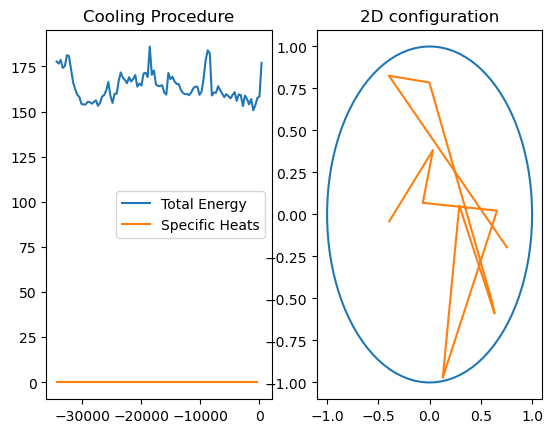

In [37]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(temps,Es, label = 'Total Energy')
ax1.plot(temps,C,label = 'Specific Heats')
ax1.legend()
#ax1.xlabel('ln(T)')
ax1.set_title('Cooling Procedure')

ax2.plot(xaxis,yaxis)
ax2.plot(final_r[:,0],final_r[:,1])
#ax2.xlabel('x-axis')
#ax2.ylabel('ylabel')
ax2.set_title('2D configuration')

plt.savefig(f'Plots for N ={N}, Linear Cooling')
plt.show()

In [30]:
linear[0,3]

0.0

In [70]:
from numpy import zeros
from tqdm import trange
Niter_T = [1, 10, 50, 100] # markov steps in each temperature
L = len(Niter_T)
N = 3 # number particles
Tmax = 300
Number_T = 100

# intialize lists to save results
T_linear = zeros((L,Number_T))
T_power = zeros((L,Number_T))
T_log = zeros((L,Number_T))
E_linear = zeros((L,Number_T))
E_power = zeros((L,Number_T))
E_log = zeros((L,Number_T))
C_linear = zeros((L,Number_T))
C_power = zeros((L,Number_T))
C_log = zeros((L,Number_T))



for i in trange(L):
    # call the annealing function and unpack its outputs
    temps,Es,C,final_r = annealing_method_Temp(N, Niter_T[i], Tmax, temp_linear, 3,Number_T)
    T_linear[i,:] = temps
    E_linear[i,:] = Es
    C_linear[i,:] = C
    temps,Es,C,final_r = annealing_method_Temp(N, Niter_T[i], Tmax, temp_power, 0.95,Number_T)
    T_power[i,:] = temps
    E_power[i,:] = Es
    C_power[i,:] = C
    temps,Es,C,final_r = annealing_method_Temp(N, Niter_T[i], Tmax, temp_log, 3,Number_T)
    T_log[i,:] = temps
    E_log[i,:] = Es
    C_log[i,:] = C

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:39<00:00,  9.97s/it]


In [72]:
from matplotlib.pyplot import plot, show, legend, title, yscale, xlabel, ylabel, xticks, yticks, savefig

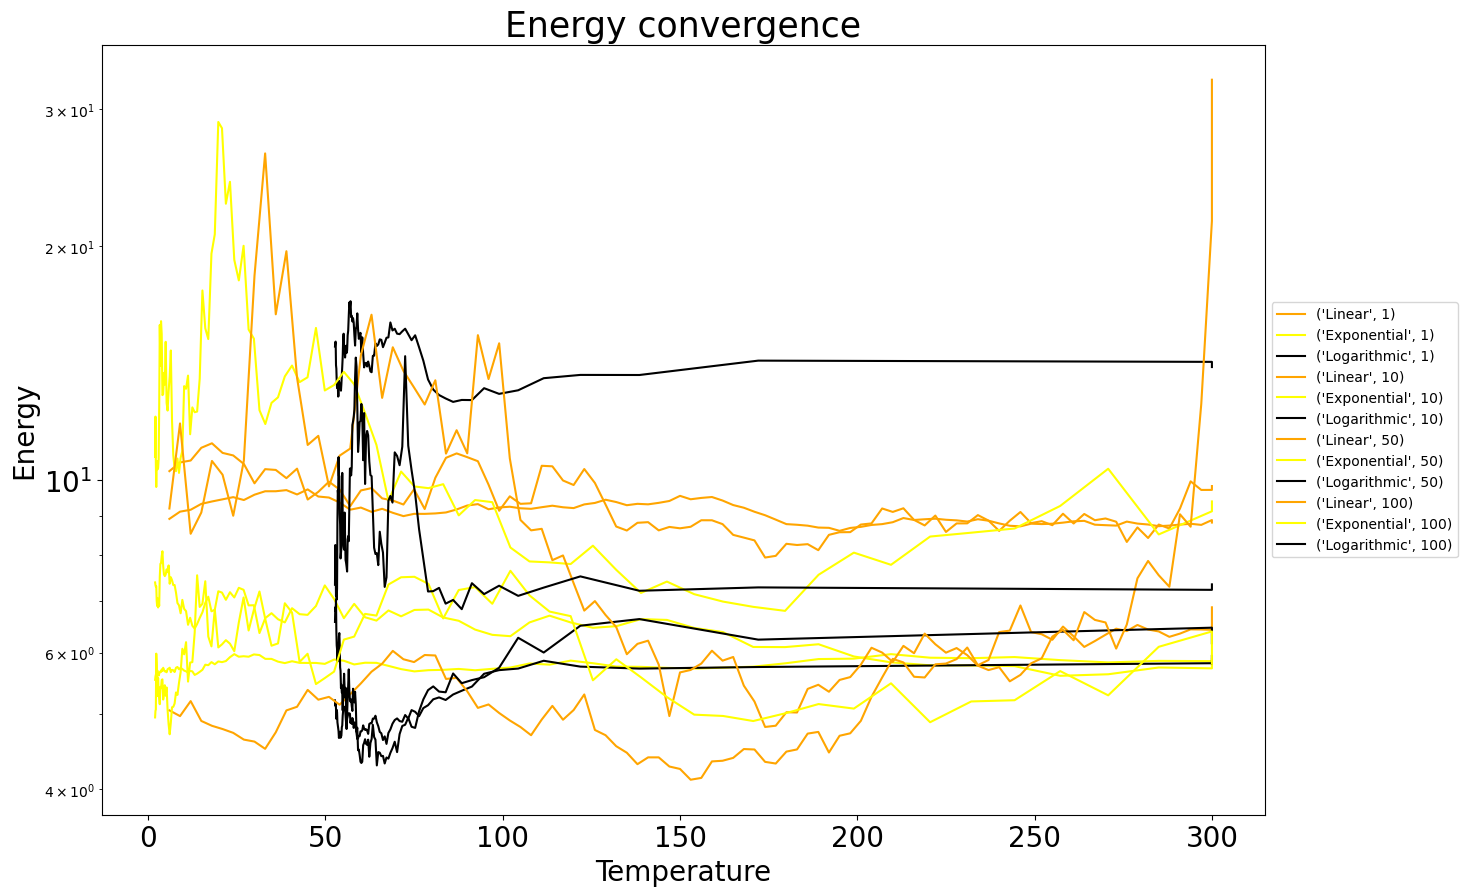

In [80]:
fig = plt.subplots(1, figsize=(15,10)) 
for i in range(L):
    plot(T_linear[i,:],E_linear[i,:], label = ('Linear',Niter_T[i]), color = "orange")
    plot(T_power[i,:],E_power[i,:], label = ('Exponential', Niter_T[i]), color = "yellow")
    plot(T_log[i,:],E_log[i,:], label = ('Logarithmic', Niter_T[i]), color = "k")
    

title('Energy convergence', fontsize = 25)
yscale("log")
legend(loc='center left', bbox_to_anchor=(1, 0.5))
xlabel("Temperature", fontsize = 20)
ylabel("Energy", fontsize = 20)
xticks(fontsize = 20)
yticks(fontsize = 20)
savefig("energy")

show()

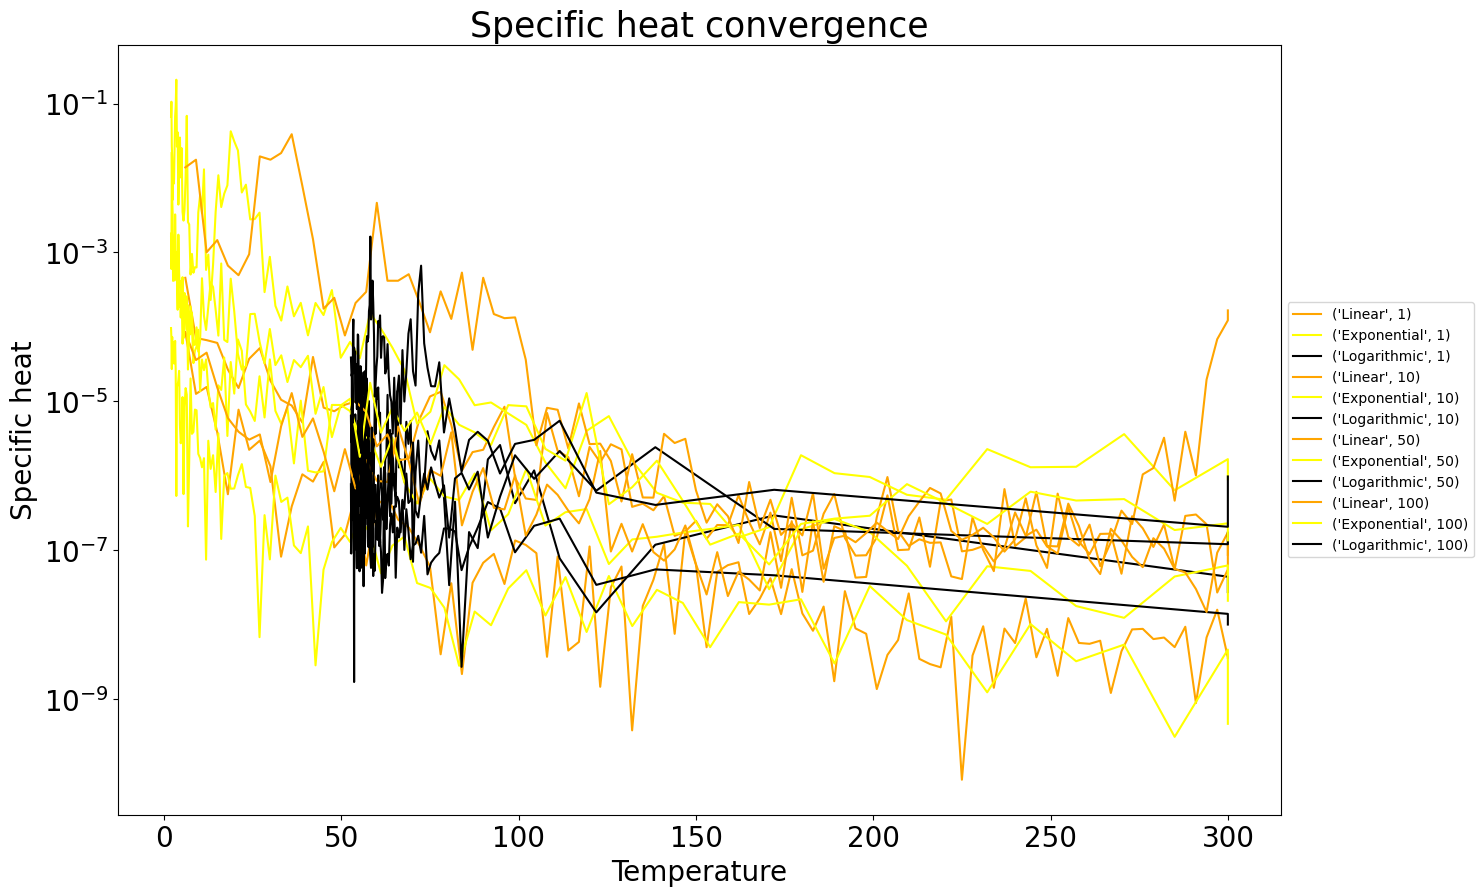

In [79]:
fig = plt.subplots(1, figsize=(15,10)) 
for i in range(L):
    plot(T_linear[i,:],C_linear[i,:],label = ('Linear',Niter_T[i]), color = "orange")
    plot(T_power[i,:],C_power[i,:],label = ('Exponential', Niter_T[i]), color = "yellow")
    plot(T_log[i,:],C_log[i,:],label = ('Logarithmic', Niter_T[i]), color = "k")
    

title('Specific heat convergence', fontsize = 25)
yscale("log")
legend(loc='center left', bbox_to_anchor=(1, 0.5))
xlabel("Temperature", fontsize = 20)
ylabel("Specific heat", fontsize = 20)
xticks(fontsize = 20)
yticks(fontsize = 20)
savefig("specific_heat")

plt.show()